# 图生图的参数设置

## strength

strength 确定生成的图像与初始图像的相似程度(取值 0~1):

- 较高的strength值赋予模型更多的“创造力”来生成与初始图像不同的图像；值为strength1.0 意味着初始图像或多或少被忽略
- 较低的strength值意味着生成的图像与初始图像更相似

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

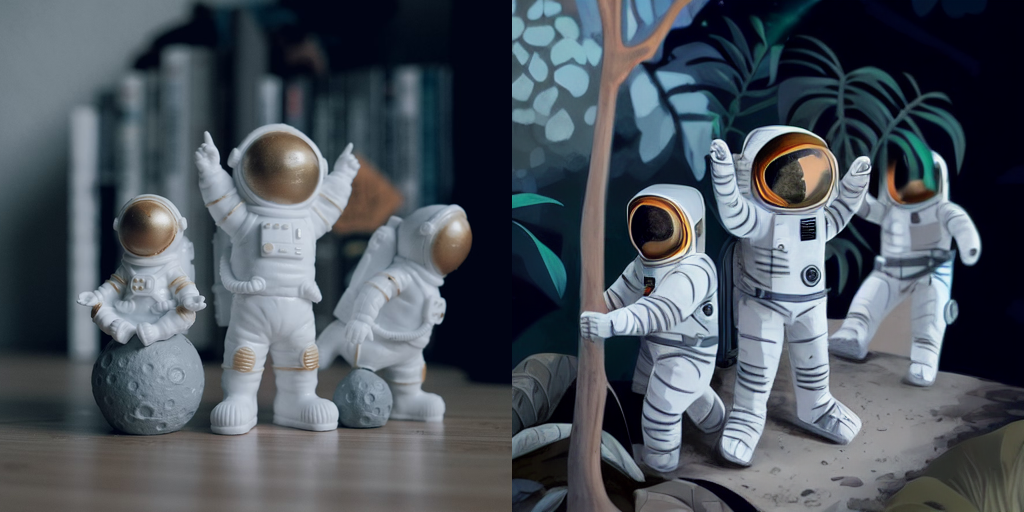

In [6]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

model_path="/models/stable-diffusion-v1-5"
pipeline = AutoPipelineForImage2Image.from_pretrained(
    model_path, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

# prepare image
url = "./img2img-init.png"
init_image = load_image(url)

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

generator = torch.Generator(device="cuda").manual_seed(1234567890)
image = pipeline(prompt, image=init_image, strength=0.6,generator=generator).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

## guidance scale

`guidance_scale` 参数用于控制生成的图像和文本提示的对齐程度。

较高的guidance_scale值意味着您生成的图像与提示更加一致。

取值范围是 `0~20`?

  0%|          | 0/25 [00:00<?, ?it/s]

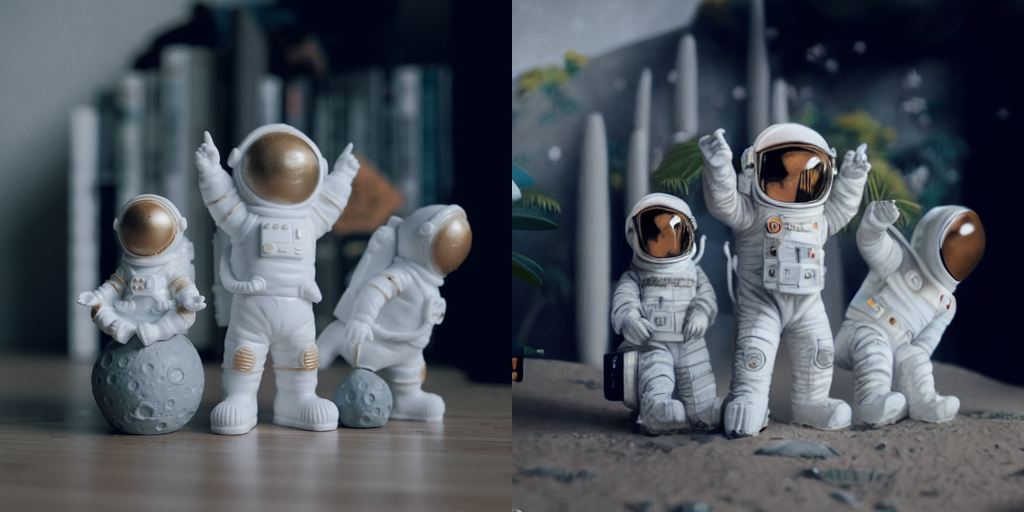

In [22]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

generator = torch.Generator(device="cuda").manual_seed(987654321)
image = pipeline(prompt, image=init_image, guidance_scale=10.0,strength=0.5,generator=generator).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

## 负面提示词

负面提示条件是模型不包含图像中的事物，它可用于提高图像质量或修改图像。

  0%|          | 0/40 [00:00<?, ?it/s]

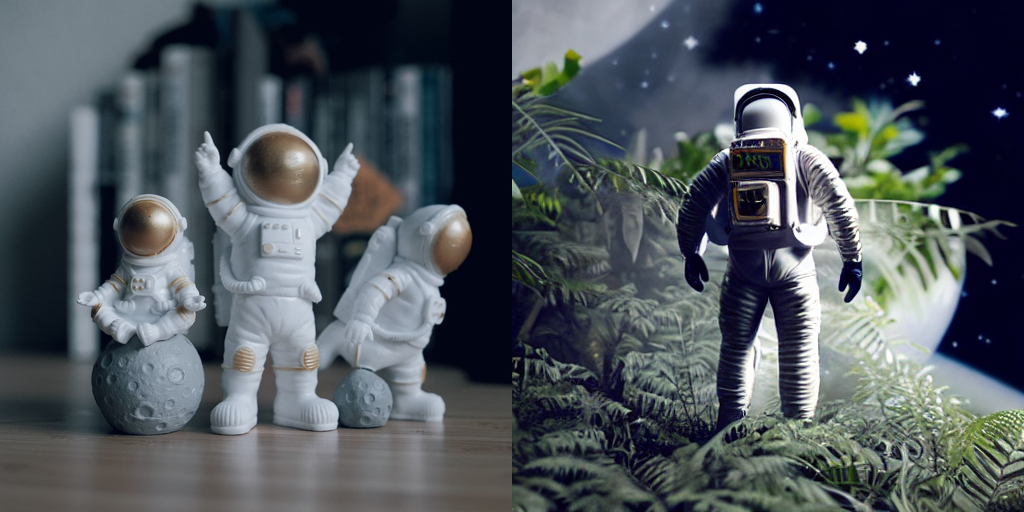

In [27]:
prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy, dark"

generator = torch.Generator(device="cuda").manual_seed(987654321)
image = pipeline(prompt, negative_prompt=negative_prompt,image=init_image,generator=generator).images[0]
make_image_grid([init_image, image], rows=1, cols=2)